# One Shot Learning with Siamese Networks

This is the jupyter notebook that accompanies

## Imports
All the imports are defined here

In [1]:
%matplotlib inline
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torchvision.utils
import numpy as np
import random
from PIL import Image
import torch
from torch.autograd import Variable
import PIL.ImageOps    
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from SiameseNetworks import SiameseNetwork,SiameseNetworkDataset,ContrastiveLoss

## Helper functions
Set of helper functions

In [2]:
def imshow(img,text=None,should_save=False):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()    

def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.show()

## Configuration Class
A simple class to manage configuration

In [4]:
class Config():
    training_dir = "./data/flower_data/train/"
    testing_dir = "./data/flower_data/valid/"
    train_batch_size = 64
    train_number_epochs = 5

## Using Image Folder Dataset

In [5]:
folder_dataset = dset.ImageFolder(root=Config.training_dir)

In [6]:
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset,
                                        transform=transforms.Compose([transforms.Resize(100),
                                                               transforms.RandomResizedCrop(100),
                                                               transforms.RandomHorizontalFlip(),
                                                               transforms.RandomRotation(10),
                                                               transforms.ToTensor(),
                                                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
                                       ,should_invert=False)

## Visualising some of the data
The top row and the bottom row of any column is one pair. The 0s and 1s correspond to the column of the image.
1 indiciates dissimilar, and 0 indicates similar.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


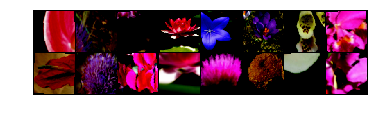

[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]]


In [7]:
vis_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=8,
                        batch_size=8)
dataiter = iter(vis_dataloader)


example_batch = next(dataiter)
concatenated = torch.cat((example_batch[0],example_batch[1]),0)
imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy())

## Training Time!

In [8]:
train_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=8,
                        batch_size=Config.train_batch_size)

In [9]:
net = SiameseNetwork().cuda()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(),lr = 0.001 )

In [10]:
counter = []
loss_history = [] 
iteration_number= 0

Epoch number 0
 Current loss 1.7250142097473145

Epoch number 0
 Current loss 1.1607725620269775

Epoch number 0
 Current loss 1.1027804613113403

Epoch number 0
 Current loss 1.088977575302124

Epoch number 0
 Current loss 1.0380680561065674

Epoch number 0
 Current loss 1.1138883829116821

Epoch number 0
 Current loss 1.0982710123062134

Epoch number 0
 Current loss 1.0594209432601929

Epoch number 0
 Current loss 1.0703951120376587

Epoch number 0
 Current loss 1.0815589427947998

Epoch number 0
 Current loss 1.1301618814468384

Epoch number 1
 Current loss 1.0423016548156738

Epoch number 1
 Current loss 1.060863733291626

Epoch number 1
 Current loss 1.0662729740142822

Epoch number 1
 Current loss 1.0294939279556274

Epoch number 1
 Current loss 0.9826347827911377

Epoch number 1
 Current loss 1.0227800607681274

Epoch number 1
 Current loss 1.0455704927444458

Epoch number 1
 Current loss 1.1108683347702026

Epoch number 1
 Current loss 1.0282217264175415

Epoch number 1
 Curren

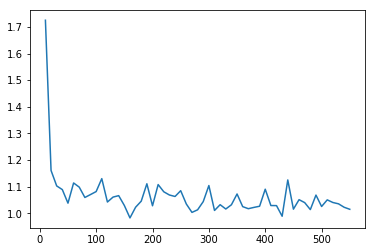

In [11]:
for epoch in range(0,Config.train_number_epochs):
    for i, data in enumerate(train_dataloader,0):
        img0, img1 , label = data
        img0, img1 , label = img0.cuda(), img1.cuda() , label.cuda()
        optimizer.zero_grad()
        output1,output2 = net(img0,img1)
        loss_contrastive = criterion(output1,output2,label)
        loss_contrastive.backward()
        optimizer.step()
        if i %10 == 0 :
            print("Epoch number {}\n Current loss {}\n".format(epoch,loss_contrastive.item()))
            iteration_number +=10
            counter.append(iteration_number)
            loss_history.append(loss_contrastive.item())
show_plot(counter,loss_history)

In [12]:
torch.save(net.state_dict(), 'model_augmented.pt')